# 6. Réponse harmonique

## 6.1 Introduction

La réponse harmonique est la réponse du système $G(z)$ à l'entrée $\left\{u(kh)\right\} = sin(\omega kh)$ pour différentes valeurs de $\omega$.

## 6.2 Fonction de transfert harmonique

La question à se poser est la suivante: quelle est la sortie du système lorsqu'on injecte en son entrée une sinusoïde $a\sin(\omega kh), \; k \geq 0$.

Par la propriété de linéarité, et en se souvenant de la formule suivante:

$$ e^{j\varphi} = \cos{\varphi} + j\sin{\varphi} $$

il est équivalent de rechercher la partie imaginaire de la réponse $y(kh)$ à une entrée $u(kh) = ae^{j\omega kh}, \; k \geq 0$.

Toujours par la propriété de linéarité, $a$ n'étant qu'un simple facteur multiplicateur, poser $a=1$ ne modifiera rien au développement.

L'entrée devient, grâce au tableau des transformées:

$$ U(z) = \frac{z}{z-e^{j\omega h}} $$

Et, par conséquent:

$$ Y(z) = G(z)\frac{z}{z-e^{j\omega h}} $$

Afin de simplifier le développement, supposons que $G(z)$ ne possède que des pôles simples à l'intérieur du cercle unité. La décomposition en éléments simples donne alors:

$$ Y(z) = c_0 + \frac{c_1 z}{z-p_1} + \frac{c_2 z}{z-p_2} + \dots + \frac{c_n z}{z-p_n} + \frac{c z}{z-e^{j\omega h}}$$

La sortie temporelle est donc:

$$ y(kh) = c_0 \Delta(kh) + c_1 p_1^k + c_2 p_2^k + \dots + c_n p_n^k + c e^{j\omega kh} $$

Comme tous les pôles sont à l'intérieur du cercle unité, soit $|p_i| < 1, \; i = 1, 2, \dots, n$, la sortie $y(kh)$ contient une partie transitoire tendant à disparaître lorsque $k \rightarrow \infty$ et une partie permanente représentée par le pôle de l'entrée $U(z)$.

Le calcul du coefficient $c$ se fait ainsi:

\begin{align}
c &= \lim_{z \rightarrow e^{j\omega h}} \left( \frac{z-e^{j\omega h}}{z}Y(z) \right) \\
  &= \lim_{z \rightarrow e^{j\omega h}} \left( \frac{z-e^{j\omega h}}{z} G(z) \frac{z}{z-e^{j\omega h}} \right) = G(e^{j\omega h})
\end{align}

Le régime permanent $c e^{j\omega kh}$ devient donc:

$$ G(e^{j\omega h})e^{j\omega kh} = \left| G(e^{j\omega h}) \right| e^{j\left(\omega kh + \arg{G(e^{j\omega h}})\right)} $$

En ne gardant que la partie imaginaire, on obtient finalement:

$$ \left| G(e^{j\omega h}) \right| \sin{\left(\omega kh + \arg{G(e^{j\omega h}})\right)}  \qquad k \geq 0 $$

Cette dernière expression est appelée la réponse harmonique. La fonction de transfert harmonique discrète $G(e^{j\omega h})$ est obtenue en remplaçant $z$ par $e^{j\omega h}$ dans $G(z)$.

Il est facile de remarquer que $G(e^{j\omega h})$ est périodique de période $\omega_e = 2\pi /h$:

$$ G(e^{j(\omega + \frac{2\pi}{h}) h}) = G(e^{j\omega h}) $$

Aussi, malgré que $\omega$ peut théoriquement prendre des valeurs allant de $[O \dots \infty[$, le théorème de Shannon impose de limiter les valeurs à $\omega \in [0 \dots \omega_N], \; \omega_N \leq \omega_e / 2$.

#### Exemple
Soit la fonction de transfert suivante:

$$ G(z) = \frac{0.5}{z-0.5} $$

Avec $h=1\; \mathrm{s}$, la fonction de transfert harmonique est:

$$ G(e^{j\omega}) = \frac{0.5}{e^{j\omega}-0.5} $$

D'où:

$$ \left| G(e^{j\omega}) \right| = \frac{0.5}{\sqrt{\cos{\omega} - 0.5}} $$
$$ \arg{G(e^{j\omega})} = - \arctan{\frac{\sin{\omega}}{\cos{\omega} - 0.5}} $$

Le code ci-dessous permet de tracer l'évolution de l'amplitude et de la phase en fonction de $\omega$.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math
import control

In [3]:
def plot_axs():
    fig, axs = plt.subplots(2, 1, constrained_layout=True)
    axs[0].plot(omega, magn, '-', label='magn')
    axs[1].plot(omega, phase, '-', label='phase')
    axs[0].set_yticks([0, 0.5, 1])
    axs[1].set_yticks([math.pi, math.pi/2, 0, -math.pi/2, -math.pi])
    axs[1].set_yticklabels([r'-$\pi$', r'-$\frac{\pi}{2}$', 0, r'-$\frac{\pi}{2}$', r'-$\pi$'])

    for i in range(len(axs)):
        axs[i].set_xlabel(r'$\omega$')
        xticks = [math.pi/2, math.pi]
        xticklabels = [r'$\frac{\pi}{2}$', r'$\omega_N=\pi$']
        for j in range(N-1 if N >= 2 else 0):
            xticks.append((j+2) * math.pi)
            xticklabels.append(
                r'{}$\omega_N$'.format(j+2)
                if (j+2) % 2 else r'{}$\omega_e$'.format(
                    int((j+2)/2) if (j+2)/2 > 1 else '')
            )
        axs[i].set_xticks(xticks)
        axs[i].set_xticklabels(xticklabels)
        axs[i].legend()

In [4]:
N = 5

omega = [math.pi * i / 100 for i in range(N*100)]

magn = [0.5/(math.sqrt(1.25-math.cos(w))) for w in omega]
phase = [-math.atan2(math.sin(w), (math.cos(w)-0.5)) for w in omega]

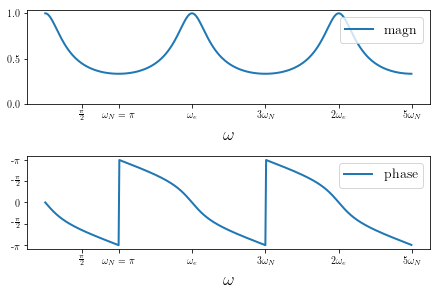

In [5]:
plot_axs()

La réponse de ce système à une sinusoïde peut être visualisée à l'aide du code suivant:

In [6]:
h = 1
omega = math.pi / 8  # try 8, 4 and 2

time = [i for i in range(51)]
u = [math.sin(omega*h*k) for k in range(51)]

G = control.tf([0.5], [1, -0.5], True)
_, y, _ = control.forced_response(G, time, u)

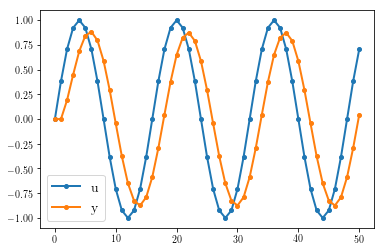

In [7]:
fig, ax = plt.subplots()
ax.plot(time, u, '.-', label='u')
ax.plot(time, y, '.-', label='y')
_ = ax.legend()

## 6.3 Réponse harmonique en boucle ouverte

### Echantillonnage à impulsions

![commande digitale](Images/digital_control_2.svg)

Cette fois-ci, analysons l'ensemble en grisé comme étant la vue analogique de l'algorithme. Cette vue permettra d'en déduire le comportement fréquenciel.

Pour commencer, le convertisseur $A-D$ ne fait qu'échantillonner un signal analogique. En négligeant la quantification, le signal obtenu est égal au signal continu aux instants d'échantillonnage.

Par contre, le convertisseur $D-A$ est différent. Il est souvent modélisé comme une opération en 2 étapes:
- interrupteur se fermant aux instants d'échantillonnage, permettant de transformer le signal discret $u(kh)$ en signal continu
$$ u^{*}(t) = \left\{
  \begin{array}{rl}
    u(kh) \qquad \text{si}\: t = kh \\
    0 \qquad \text{si}\: t \neq kh
  \end{array} \right. $$
- une fonction de transfert créant un signal dont la valeur vaut $u*(t)$ pendant toute la période d'échantillonnage 
$$ F(s) = \frac{1}{s}(1 - e^{-sh})$$

La figure suivante montre le modèle du convertisseur:

![Convertisseur D-A](Images/DA_converter.svg)

L'étude de sa fonction de transfert harmonique donne:

\begin{align}
  F(j\omega) &= \frac{1}{j\omega}(1-e^{-j\omega h}) \\
  &= \frac{1}{j\omega}2je^{-j\omega \frac{h}{2}}\frac{e^{j\omega \frac{h}{2}}-e^{-j\omega \frac{h}{2}}}{2j} \\
  &= e^{-j\omega \frac{h}{2}} \frac{2}{\omega} \sin{\left( \omega \frac{h}{2} \right)} \\
  &= e^{-j\omega \frac{h}{2}} h \frac{\sin{\left( \omega \frac{h}{2} \right)}}{\omega \frac{h}{2}}
\end{align}

D'où:

$$ \left| F(j\omega) \right| = h \frac{\left| \sin{\left( \omega \frac{h}{2} \right)}\right|}{\omega \frac{h}{2}}$$

$$ \arg{F(j\omega)} = -\omega \frac{h}{2} $$

Ce comportement est tracé ci-dessous:

In [8]:
N = 6

omega_e = 2 * math.pi

omega = [math.pi * i / 100 for i in range(1, N*100)]

magn = [abs(math.sin(w/2))/(w/2) for w in omega]
phase = [-(w%omega_e)/2 for w in omega]

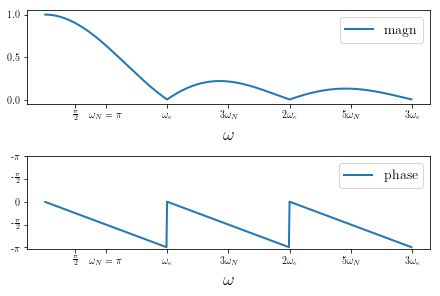

In [9]:
plot_axs()

Le convertisseur se comporte donc comme un filtre passe-bas, dont l'amplitude est nulle aux fréquences multiples de la fréquence d'échantillonnage.

#### Remarque
Soit une entrée $u(kh)=\sin{(2\pi kh)}, \: h=0.1\: \mathrm{s}$; la sortie du convertisseur passant par un bloqueur d'ordre zéro, elle est décomposable en une fondamentale et des harmoniques. La fondamentale est donnée par:

$$ u(t) = 0.98 \sin{\left(2\pi (t-0.05)\right)} \qquad t \geq 0 $$

Le convertisseur engendre donc un retard de $0.05\: \mathrm{s}$, soit une demi période d'échantillonnage.

La figure suivante permet de mieux se représenter cela:

In [10]:
time = [i/100 for i in range(101)]

time_s = [i/10 for i in range(10)]

u_kh = [math.sin(2*math.pi*t) for t in time_s]

u_t = [0.98 * math.sin(2*math.pi*(t-0.05)) for t in time]

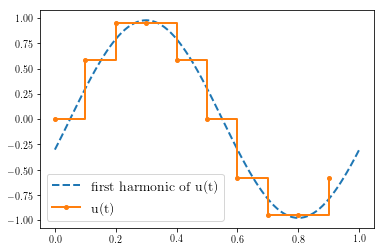

In [11]:
fig, ax = plt.subplots()
ax.plot(time, u_t, '--', label='first harmonic of u(t)')
ax.step(time_s, u_kh, '.-', where='post', label='u(t)')
ax.legend()

Il est aisé de remarquer que la fondamentale passe par les mêmes points que le signal $u(t)$, mais avec un retard d'une demi période d'échantillonnage.

### Essai harmonique à différentes fréquences

Au lieu d'effectuer un long développement mathématique, le plus simple est de réaliser des essais et d'en visualiser les résultats. Un exemple est proposé et le code permettra de recréer l'environnement de simulation correspondant.

#### Exemple
Soit le système régulé, pour lequel:

$$ K(z) = 1 $$

$$ G(s) = \frac{4}{s(s+2)} $$

La période d'échantillonnage vaut $h=0.025\; \mathrm{s}$, soit $f_e = 40\; \mathrm{Hz}$.

In [86]:
h = 0.025

f = 2 # try f = 2, 19, 39
omega = 2 * math.pi * f

time = [i/100000 for i in range(500001)]
time_s = [i/40 for i in range(201)]

e_t = [math.sin(omega * t) for t in time]

u_kh = [math.sin(omega * t) for t in time_s]
u_t = [u_kh[int(t//h)] for t in time]

G = control.tf([4], [1, 2, 0])
_, y_t, _ = control.forced_response(G, time, u_t)

In [ ]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(time, e_t, '-', label='e(t)')
axs[1].plot(time, y_t, '-', label='y(t)')
axs[0].legend()
axs[1].legend()

On remarque ce qui suit:
- pour $f = 2\; \mathrm{Hz}$: la sortie $y(t)$ a la même fréquence que $e(t)$, avec une amplitude plus faible et un déphasage; c'est ce qu'on attend d'un filtre passe-bas analogique
- pour $f = 19\; \mathrm{Hz}$: la sortie $y(t)$ a la même fréquence que $e(t)$ mais fait apparaître un battement dont la fréquence de l'enveloppe vaut $20 - 19 = 1\; \mathrm{Hz}$
- pour $f = 39\; \mathrm{Hz}$: la sortie $y(t)$ a une fréquence de $40 - 39 = 1\; \mathrm{Hz}$

Il est donc très important, non seulement de respecter la pulsation de Nyquist, mais aussi de s'en éloigner le plus possible. En effet, le deuxième essai respecte la condition du théorème de Shannon, et pourtant on voit apparaître un battement indésirable. Par contre, le premier essai étant suffisamment éloigné de la pulsation de Nyquist, le résultat est satisfaisant. Il est inutile de parler du dernier essai, les résultats étant très éloignés de ce à quoi on s'attendrait, le théorème de Shannon n'étant pas du tout respecté.